In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [206]:
apv_1 = pd.read_csv("arrival_profile_value.csv", usecols=['value'], parse_dates=True)

In [207]:
apv_2 = pd.read_csv("arrival_profile_data.csv", usecols=['ts'], parse_dates=True)

In [208]:
merged_apv = pd.concat([apv_1, apv_2], axis=1)

In [209]:
merged_apv['ts'] = pd.to_datetime(merged_apv['ts']).dt.tz_localize(None)
merged_apv['ts'] = merged_apv['ts'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [210]:
merged_apv.set_index('ts', inplace=True)
merged_apv = merged_apv.dropna()

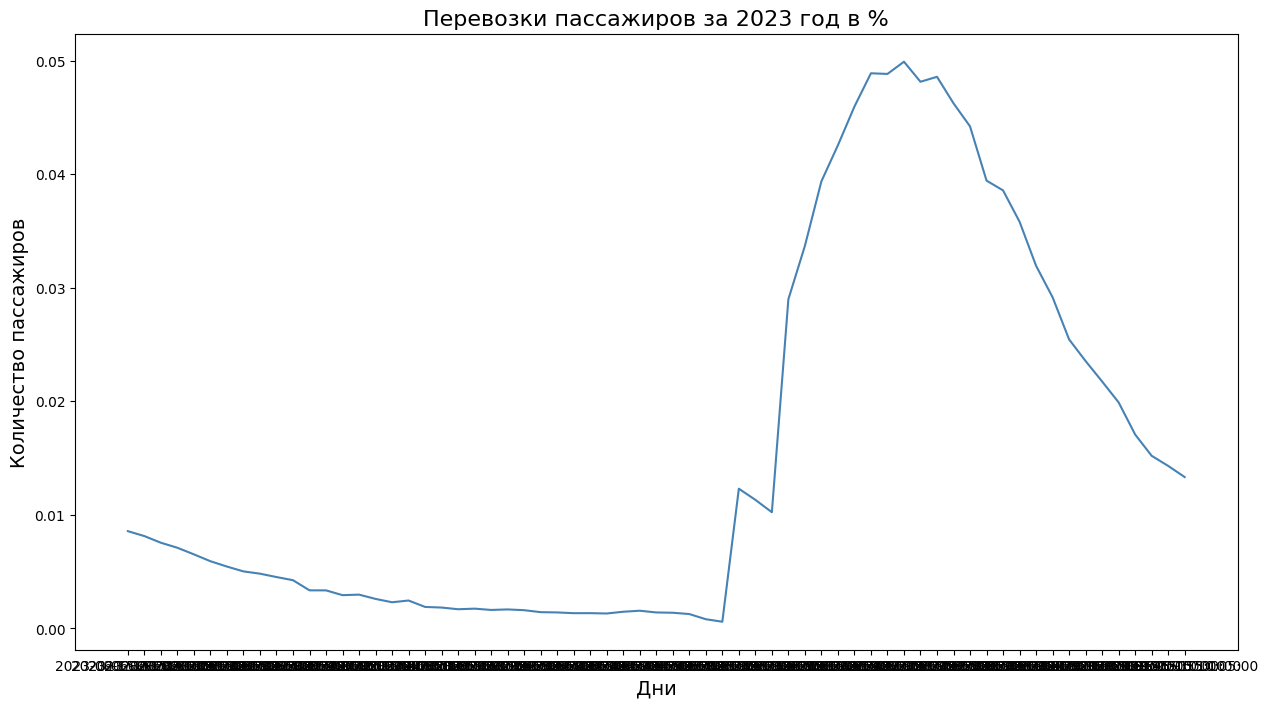

In [212]:
plt.figure(figsize = (15,8))

plt.plot(merged_apv, color = 'steelblue')

plt.xlabel('Дни', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров за 2023 год в %', fontsize = 16)

plt.show()

In [213]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [214]:
plt.figure(figsize=(15,8))

model = SARIMAX(merged_apv, order = (2, 0, 0), seasonal_order = (2, 1, 0, 50))
result = model.fit()

<Figure size 1500x800 with 0 Axes>

In [215]:
start = len(merged_apv)
end = len(merged_apv) + len(merged_apv) - 1

In [216]:
predictions = result.predict(start, end)

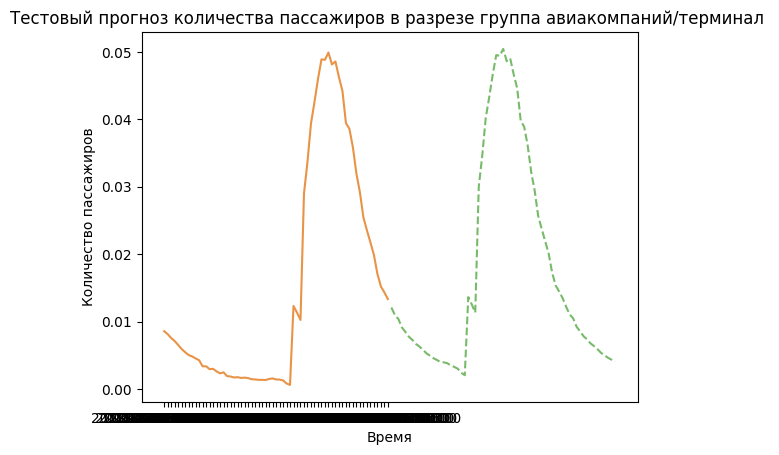

In [217]:
plt.plot(merged_apv, color='#e99347')
plt.plot(predictions, linestyle='--', color='#77bb6a', )
    
plt.title("Тестовый прогноз количества пассажиров в разрезе группа авиакомпаний/терминал ")
plt.ylabel('Количество пассажиров')
plt.xlabel('Время')

plt.show()